Summary of the results of initial condition mapping experiments.

In [1]:
import pickle as pkl
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from itertools import product

In [3]:
def get_timestamp(filen):
    filen = filen.replace('_','').replace('-','')
    return filen[-16:-4]

#Load the data
results = []
#Change this to wherever you have the data
PATH = "../Data/results/all_results/"
for filen in glob(PATH + "**/*.pkl",recursive=True):
    #Ignore the config files
    if filen[-10:]!='config.pkl':
        with open(filen, 'rb') as file:
            item = pkl.load(file)
            item['filename'] = filen
            item['timestamp'] = get_timestamp(filen)
            results.append(item)

#Sort by timestamp, break ties alphabetically by experiment name
results.sort(key=lambda item:(item['timestamp']+' '.join(item['experiment'])))
for i in range(len(results)):
    results[i]['id']=i

In [5]:
def get_experiment(*exp_id):
    """Retrieves an experiment from results with the given """
    for item in results[::-1]:
        if exp_id == item['experiment']:
            return item
    raise ValueError("No such experiment.")

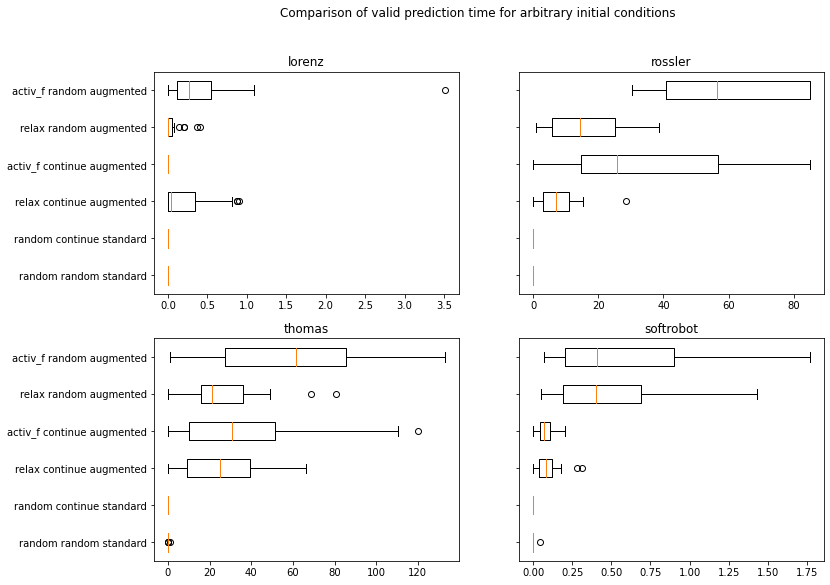

In [19]:
exps_to_plot = [
    ('activ_f', 'random', 'augmented'),
    ('relax', 'random', 'augmented'),
    ('activ_f', 'continue', 'augmented'),
    ('relax', 'continue', 'augmented'),
    ('random','continue','standard'),
    ('random','random','standard')
    ][::-1] #reverse so that the written order is the order the boxplots are shown

systems = ['lorenz','rossler','thomas','softrobot']
plt.figure(figsize=(12,9))

for ax_id, s in enumerate(systems):
    plt.subplot(2,2,ax_id+1)
    data = [get_experiment(s, *exp)['random'] for exp in exps_to_plot]
    if (ax_id % 2)==0:
        labels = [' '.join(exp) for exp in exps_to_plot]
    else:
        labels = ['']*len(exps_to_plot)
    plt.boxplot(data,labels=labels,vert=False)
    plt.title(s)
    
plt.suptitle('Comparison of valid prediction time for arbitrary initial conditions')
plt.show()

The above chart shows the performance of the algorithm with two different initial condition mappings (the first term) and two sets of hyperparameters (the second term is the prediciton type they were optimized for). The third term describes the input algorithm. The Lorenz, Rossler, and Thomas systems are chaoitic attractors. The soft robot system data is from measurements of a physical system.

The x-axis is the valid prediction time; that is, the amount of time for which the reservoir's prediction was within a certain tolerance of the actual orbit.

The first four rows of each plot are using the proposed algorithm, and the last two are using the traditional algorithm.